### STA 4724: Homework 3 - Due Tuesday, Oct. 17 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name: Daniel Rodriguez**                     

**Your ID: 4802087**

## Question 1: kNN
For the *yeast* dataset, we want to predicte the compartment in a cell that a yeast protein will localize to based on properties of its sequence.

**(a)** Read the training and testing datasets.

In [1]:
import pandas as pd

train_data = pd.read_csv('yeast_train.csv')
test_data = pd.read_csv('yeast_test.csv')
display(train_data)
display(test_data)

,id,f0,f1,f2,f3,f4,f5,f6,f7,class
0,1,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,2,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,3,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,4,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,5,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1034,1035,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,CYT
1035,1036,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1036,1037,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1037,1038,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


,id,f0,f1,f2,f3,f4,f5,f6,f7,class
0,1,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
1,2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
2,3,0.58,0.47,0.54,0.11,0.5,0.0,0.51,0.26,NUC
3,4,0.50,0.34,0.55,0.21,0.5,0.0,0.49,0.22,NUC
4,5,0.61,0.60,0.55,0.21,0.5,0.0,0.50,0.25,NUC
...,...,...,...,...,...,...,...,...,...,...
440,441,0.47,0.38,0.58,0.19,0.5,0.0,0.57,0.22,CYT
441,442,0.39,0.58,0.47,0.18,0.5,0.0,0.48,0.22,MIT
442,443,0.38,0.47,0.47,0.18,0.5,0.0,0.44,0.26,MIT
443,444,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22,MIT


**(b)** Use leave-one-out cross validation to select the value of $k$ for kNN model.

Hint 1: try to apply kNN with a fixed $k$ first, then figure out how to use cross validation. In *yeast_3.txt*, I list the result when $k=3$ and you can use it as a reference.

Hint 2: Some of the $k$ values are not suitable to be the "best". You shouldn't even test them in the cross validation.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np

X_train = train_data.drop(['class','id'], axis=1)
X_train = np.ascontiguousarray(X_train.astype(float))
y_train = train_data['class']

#hint 1 attempt
clst = KNeighborsClassifier(n_neighbors=3)
h1_score = cross_val_score(clst, X_train, y_train, cv=LeaveOneOut())

#hint 2 omit 
best_k = 0
best_score = 0
#generate range
rng = [2**i - 1 for i in range(1, len(X_train),1) if i < len(X_train)]
rng = [i for i in rng if i <= len(X_train)]
for k in rng:
    knn_loo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_loo, X_train, y_train, cv=LeaveOneOut())
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
        
print(f'attempt 1, k = 3, score = {h1_score.mean()}')
print(f'attempt 2, k = {best_k}, score = {best_score}')

attempt 1, k = 3, score = 0.5611164581328201
attempt 2, k = 31, score = 0.6082771896053898


**(c)** Train the kNN model with the best $k$, and use it to predicte the testing data.

In [3]:
clst_best = KNeighborsClassifier(n_neighbors=best_k)
clst_best.fit(X_train, y_train)

X_test = test_data.drop(['class','id'], axis=1)
y_pred = clst_best.predict(X_test)
display(y_pred)

C:\Users\danma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['CYT', 'MIT', 'CYT', 'CYT', 'CYT', 'ME1', 'CYT', 'CYT', 'CYT',
       'ME1', 'EXC', 'ME2', 'CYT', 'ME1', 'CYT', 'CYT', 'CYT', 'MIT',
       'MIT', 'NUC', 'CYT', 'CYT', 'CYT', 'ME1', 'MIT', 'MIT', 'MIT',
       'MIT', 'ME3', 'MIT', 'ME1', 'ME3', 'CYT', 'CYT', 'CYT', 'MIT',
       'NUC', 'MIT', 'CYT', 'MIT', 'ME3', 'CYT', 'NUC', 'CYT', 'NUC',
       'CYT', 'MIT', 'NUC', 'CYT', 'NUC', 'CYT', 'NUC', 'NUC', 'MIT',
       'CYT', 'MIT', 'CYT', 'NUC', 'CYT', 'ME1', 'ME1', 'MIT', 'MIT',
       'ME3', 'MIT', 'MIT', 'MIT', 'CYT', 'CYT', 'CYT', 'EXC', 'NUC',
       'CYT', 'MIT', 'CYT', 'MIT', 'EXC', 'EXC', 'CYT', 'CYT', 'CYT',
       'NUC', 'CYT', 'CYT', 'NUC', 'NUC', 'CYT', 'NUC', 'MIT', 'NUC',
       'CYT', 'NUC', 'NUC', 'CYT', 'ME3', 'NUC', 'CYT', 'ME2', 'CYT',
       'CYT', 'NUC', 'MIT', 'NUC', 'EXC', 'NUC', 'NUC', 'CYT', 'ME3',
       'ME3', 'CYT', 'ME3', 'ME1', 'ME1', 'CYT', 'ME3', 'ME3', 'MIT',
       'NUC', 'NUC', 'CYT', 'CYT', 'ME3', 'MIT', 'CYT', 'ME3', 'CYT',
       'NUC', 'CYT',

**(d)** Print the confusion matrix, then manually compute the accuracy based on the confusion matrix. That is, don't call any built-in function for the accuracy, but type the equation you will use for calculating the accuracy.

In [4]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(test_data['class'],y_pred)
display(conf)

accuracy = (conf[0][0] + conf[1][1] / conf.sum())
print(f'Accuracy: {accuracy}')

array([[89,  0,  1,  0,  2, 13, 33,  0,  0],
       [ 0,  6,  3,  0,  0,  1,  0,  0,  0],
       [ 0,  3, 10,  0,  0,  1,  0,  0,  0],
       [ 4,  0,  3,  3,  3,  3,  2,  0,  0],
       [ 4,  0,  1,  0, 38,  2,  2,  0,  0],
       [26,  0,  3,  2,  1, 44,  5,  0,  0],
       [48,  0,  0,  0,  3, 13, 59,  0,  0],
       [ 6,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0,  3,  0,  0]], dtype=int64)

Accuracy: 89.01348314606741


## Question 2: Logistic Regression

We study the *myopia* dataset in this problem.

**(a)** Read the data file and make a scatterplot of MYOPIA vs. SPHEQ.

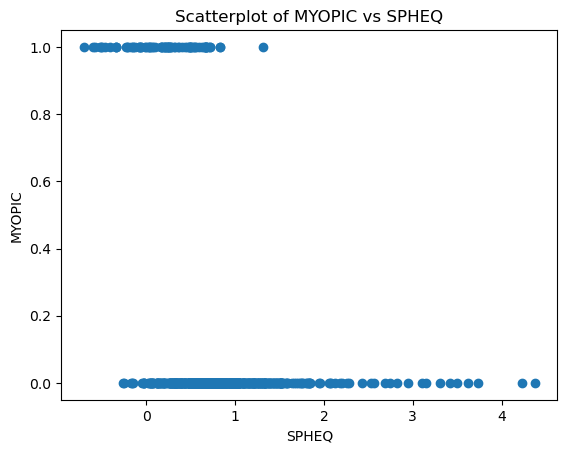

In [5]:
import matplotlib.pyplot as plt

q2_df = pd.read_csv('myopia.csv')
plt.scatter(q2_df['SPHEQ'], q2_df['MYOPIC'])
plt.xlabel('SPHEQ')
plt.ylabel('MYOPIC')
plt.title('Scatterplot of MYOPIC vs SPHEQ')
plt.show()

**(b)** Fit the logistic regression model of SPHEQ on MYOPIA

In [6]:
from sklearn.linear_model import LogisticRegression

X = q2_df[['SPHEQ']]
y = q2_df['MYOPIC']

clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

**(c)** Plot the logistic function found in (b) together with the scatterplot. You are looking for something like 

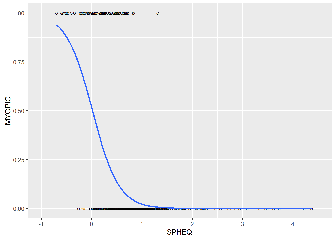

Hint: Although we didn't make this logistic function plot in class, the idea behind it is similar to the linear function plot in the earlier lecture. 

C:\Users\danma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


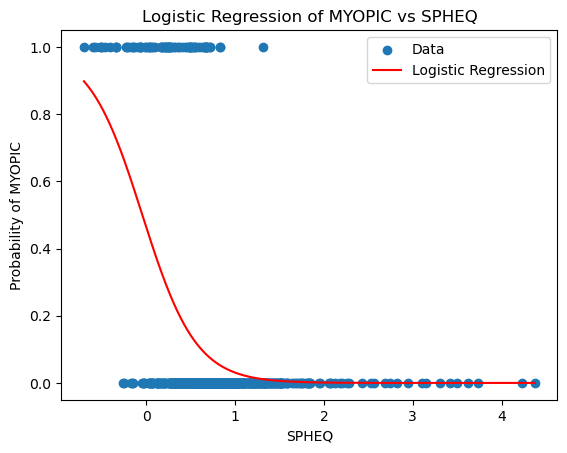

In [7]:
plt.scatter(q2_df['SPHEQ'],q2_df['MYOPIC'],label='Data')
x_values = np.linspace(q2_df['SPHEQ'].min(), q2_df['SPHEQ'].max(), 1000)
y_values = clf.predict_proba(x_values.reshape(-1,1))[:, 1]

plt.plot(x_values, y_values, color='red', label='Logistic Regression')

plt.xlabel('SPHEQ')
plt.ylabel('Probability of MYOPIC')
plt.title('Logistic Regression of MYOPIC vs SPHEQ')
plt.legend()
plt.show()

## Question 3: Naive Bayes
We have the *vote* datasets collected from 1984 United States Congressional Voting Records.

**(a)** Read the training and testing data file, and make any necessary preprocess so the data is ready to be used by naive bayes.

Hint: computer cannot read 'y/n' just like it cannot read tweets directly.

In [8]:
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('vote_train.csv')
test_data = pd.read_csv('vote_test.csv')

display(train_data)

label_encoders = {}
for column in train_data.columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.fit_transform(test_data[column])
    label_encoders[column] = le
    
display(train_data)

,id,'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','class'
0,1,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y,republican
1,2,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n,republican
2,3,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,4,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y,democrat
4,5,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,375,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,republican
375,376,n,y,n,y,y,y,n,n,n,n,y,y,n,y,n,n,democrat
376,377,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y,democrat
377,378,n,y,n,y,y,y,n,n,n,n,n,n,y,n,n,n,republican


,id,'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','class'
0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1
2,2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
4,4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1
375,375,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0
376,376,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,0
377,377,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1


**(b)** Train the bayes model and use it to predict the voting result on the testing data.

In [9]:
from sklearn.naive_bayes import GaussianNB

X_train = train_data.drop("'class'", axis=1)
y_train = train_data["'class'"]

nb = GaussianNB()
nb.fit(X_train, y_train)

X_test = test_data.drop("'class'", axis=1)
y_pred = nb.predict(X_test)
y_test = test_data["'class'"]

**(c)** Plot the ROC curve and report AUC.

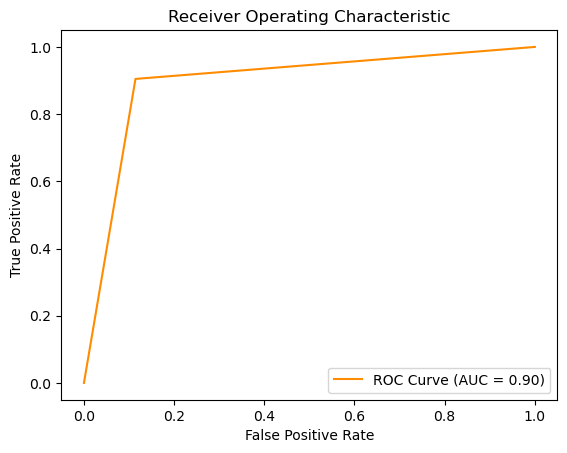

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**(d, Extra question, No bonus point)** Based on the data in the traning set, what's the most significant character for the republican voters? Can you write a short program to find it out? 

Hint: We didn't cover this in class.

**Answer:** 

In [11]:
sig = np.abs(nb.theta_[0] - nb.theta_[1]) / (nb.var_[0] + nb.var_[1])

most_significant_feature = X_train.columns[np.argmax(sig)]
print(f'The most significant feature for republican voters is: {most_significant_feature}')

The most significant feature for republican voters is: 'physician-fee-freeze'
